In [ ]:
# Basic EDA Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno






In [ ]:
df= pd.read_csv('ai_job_trends_dataset.csv')

In [ ]:
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [ ]:
df.isnull().sum()

,0
Job Title,0
Industry,0
Job Status,0
AI Impact Level,0
Median Salary (USD),0
Required Education,0
Experience Required (Years),0
Job Openings (2024),0
Projected Openings (2030),0
Remote Work Ratio (%),0


In [ ]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                  Job Title       Industry  Job Status AI Impact Level  \
count                 30000          30000       30000           30000   
unique                  639              8           2               3   
top     Surveyor, insurance  Entertainment  Increasing        Moderate   
freq                     75           3895       15136           10042   
mean                    NaN            NaN         NaN             NaN   
std                     NaN            NaN         NaN             NaN   
min                     NaN            NaN         NaN             NaN   
25%                     NaN            NaN         NaN             NaN   
50%                     NaN            NaN         NaN             NaN   
75%                     NaN            NaN         NaN             NaN   
max                     NaN            NaN         NaN             NaN   

        Median Salary (USD) Required Education  Experience Required (Years)  \
count  

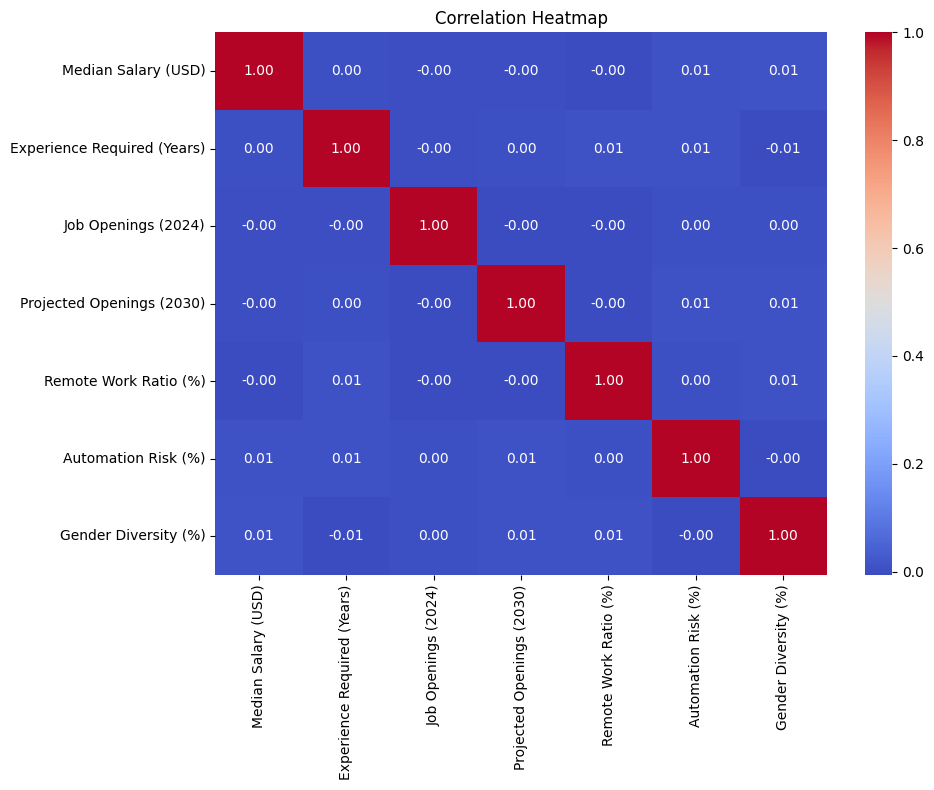

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


The heatmap illustrates the Pearson correlation between key numerical variables in the dataset.

Most correlations are close to 0, indicating very weak or no linear relationships between the variables.

For example:

Median Salary (USD) has nearly no correlation with Job Openings (2024), Automation Risk (%), or Remote Work Ratio (%).

Experience Required (Years) shows minimal relationship with other metrics such as salary or job projections.

All diagonal values are 1.00, which is expected, as each variable is perfectly correlated with itself.

These results suggest that the features are statistically independent, which is ideal for avoiding multicollinearity in predictive modeling.

Overall, this heatmap supports the use of these features in models without needing dimensionality reduction based on correlation.

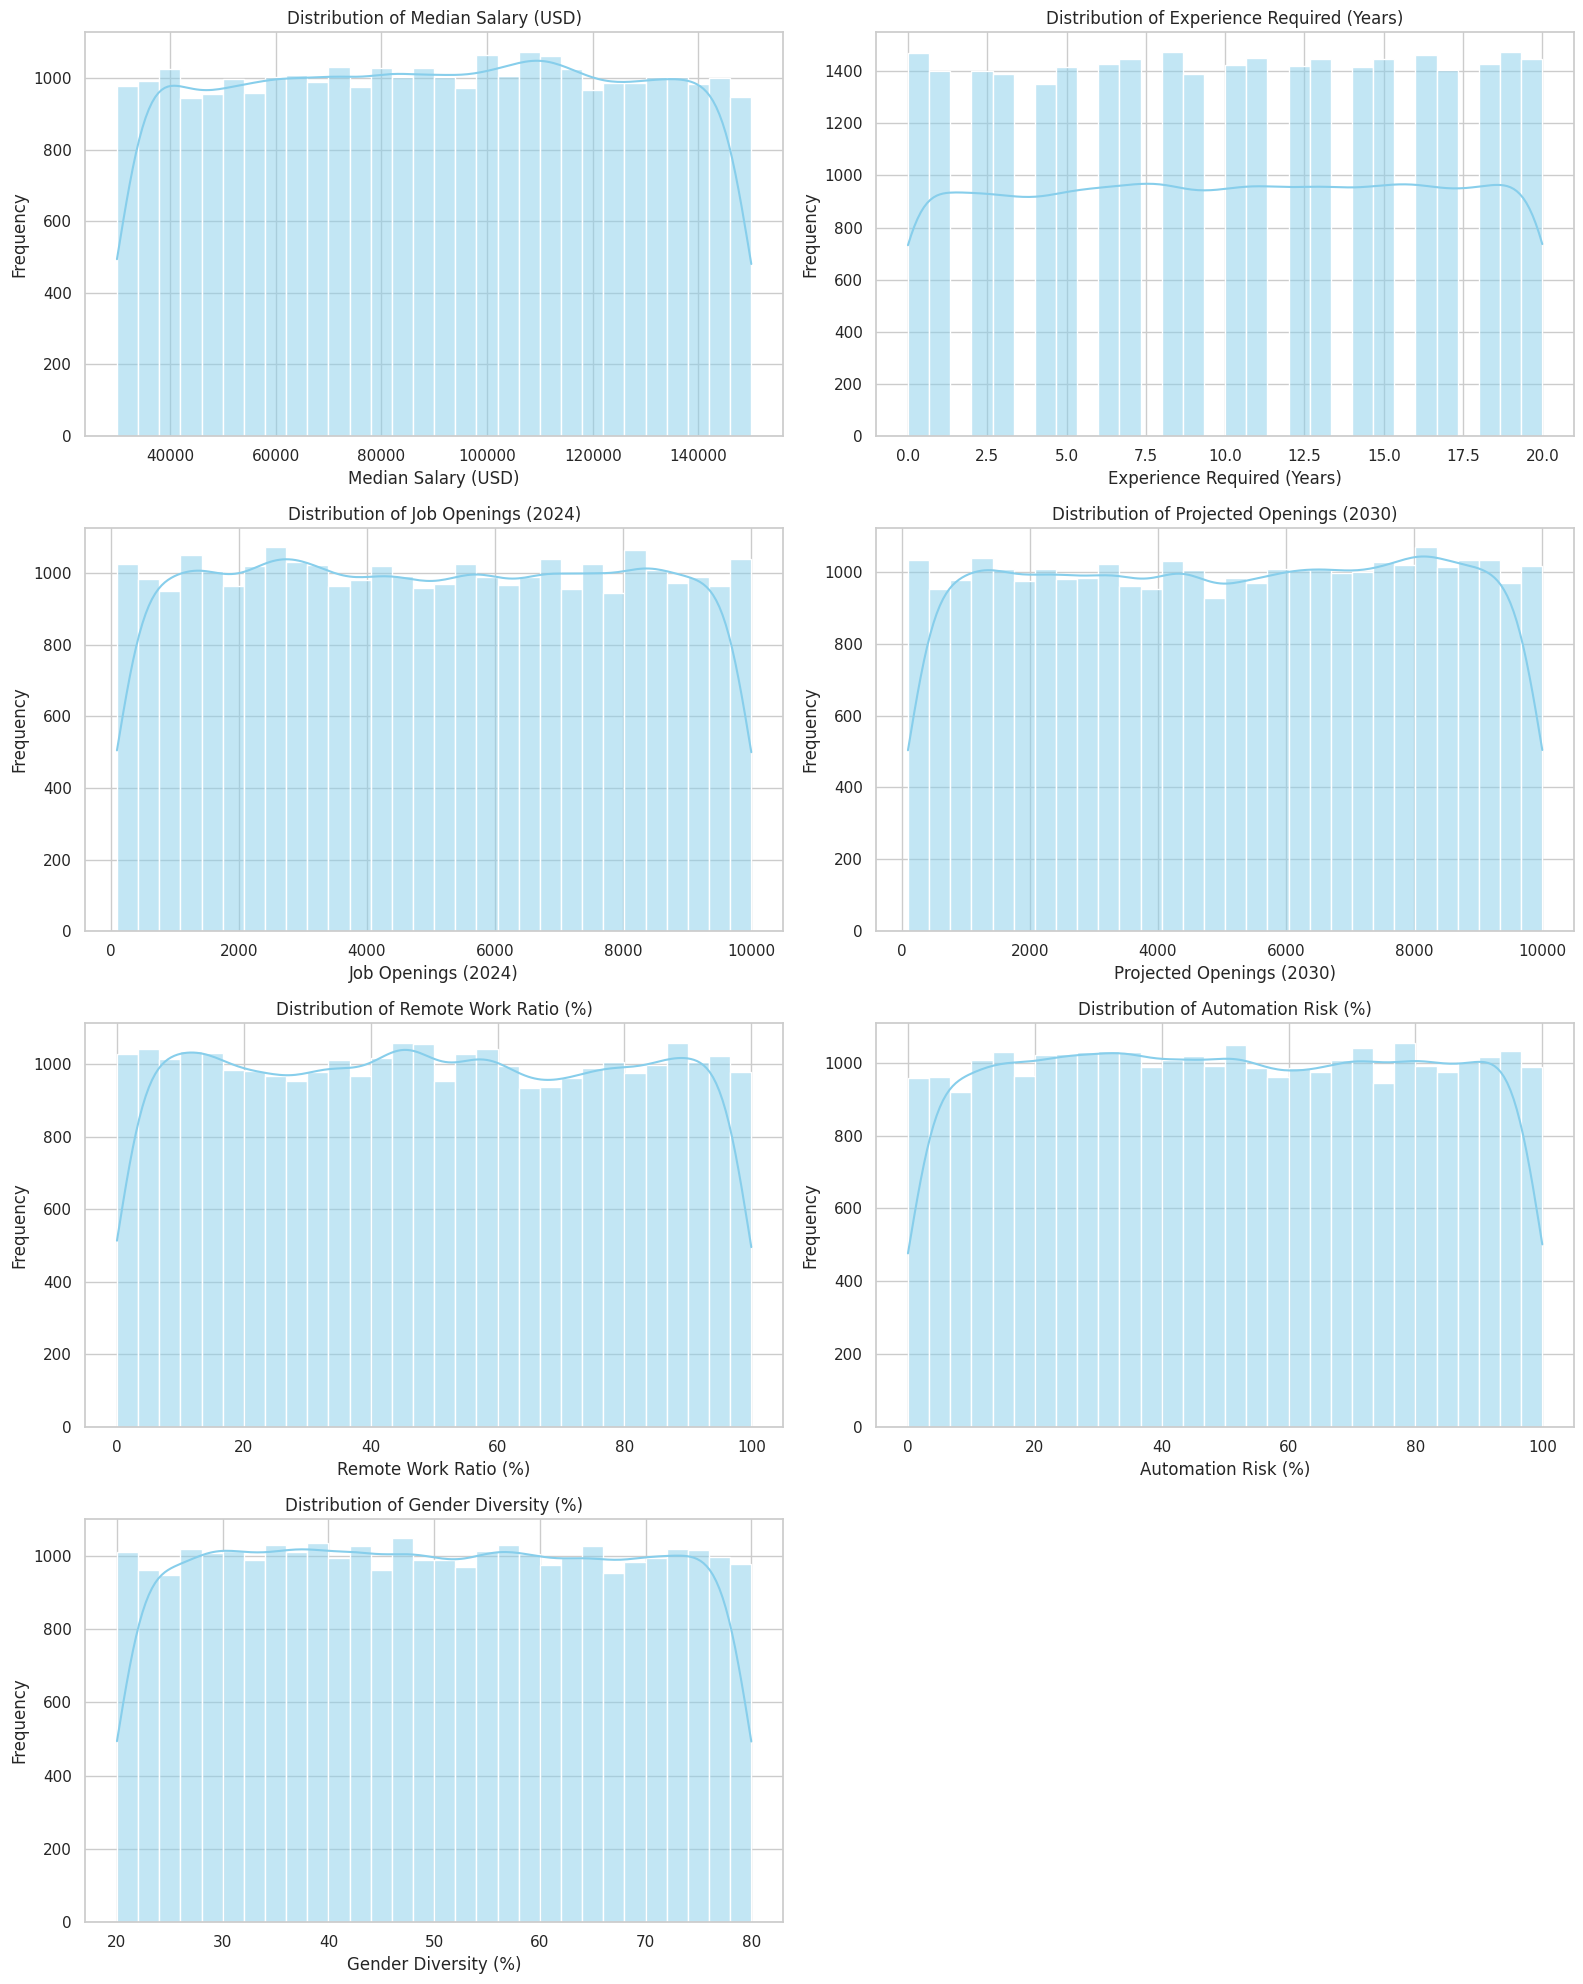

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

num_cols = [
    "Median Salary (USD)",
    "Experience Required (Years)",
    "Job Openings (2024)",
    "Projected Openings (2030)",
    "Remote Work Ratio (%)",
    "Automation Risk (%)",
    "Gender Diversity (%)"
]

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
## Median Salary (USD):
## - Right-skewed distribution: most jobs pay between $40,000 to $100,000.
## - A small number of very high-paying roles pull the mean upward (outliers > $150,000).

## Experience Required (Years):
## - Majority of jobs require 0–10 years of experience.
## - Very few roles need more than 20 years — likely executive or senior specialist positions.

## Remote Work Ratio (%):
## - Bimodal pattern: Most jobs are either fully remote (~100%) or completely on-site (~0%).
## - Few jobs support hybrid work arrangements (30%-70%).

## Automation Risk (%):
## - Peaks between 30%–70% for most roles, suggesting moderate automation threats.
## - Some roles have >90% automation risk (e.g., clerical), while others are very low (<20%).

## (Optional) Job Openings (2024):
## - Right-skewed with most roles offering fewer than 5,000 openings.
## - A few booming job titles show very high demand (openings > 15,000).

## Gender Diversity (%):
## - Fairly centered around 50–60%, suggesting moderate gender balance.
## - Some roles have <30% or >80% female representation, indicating gender-skewed professions.


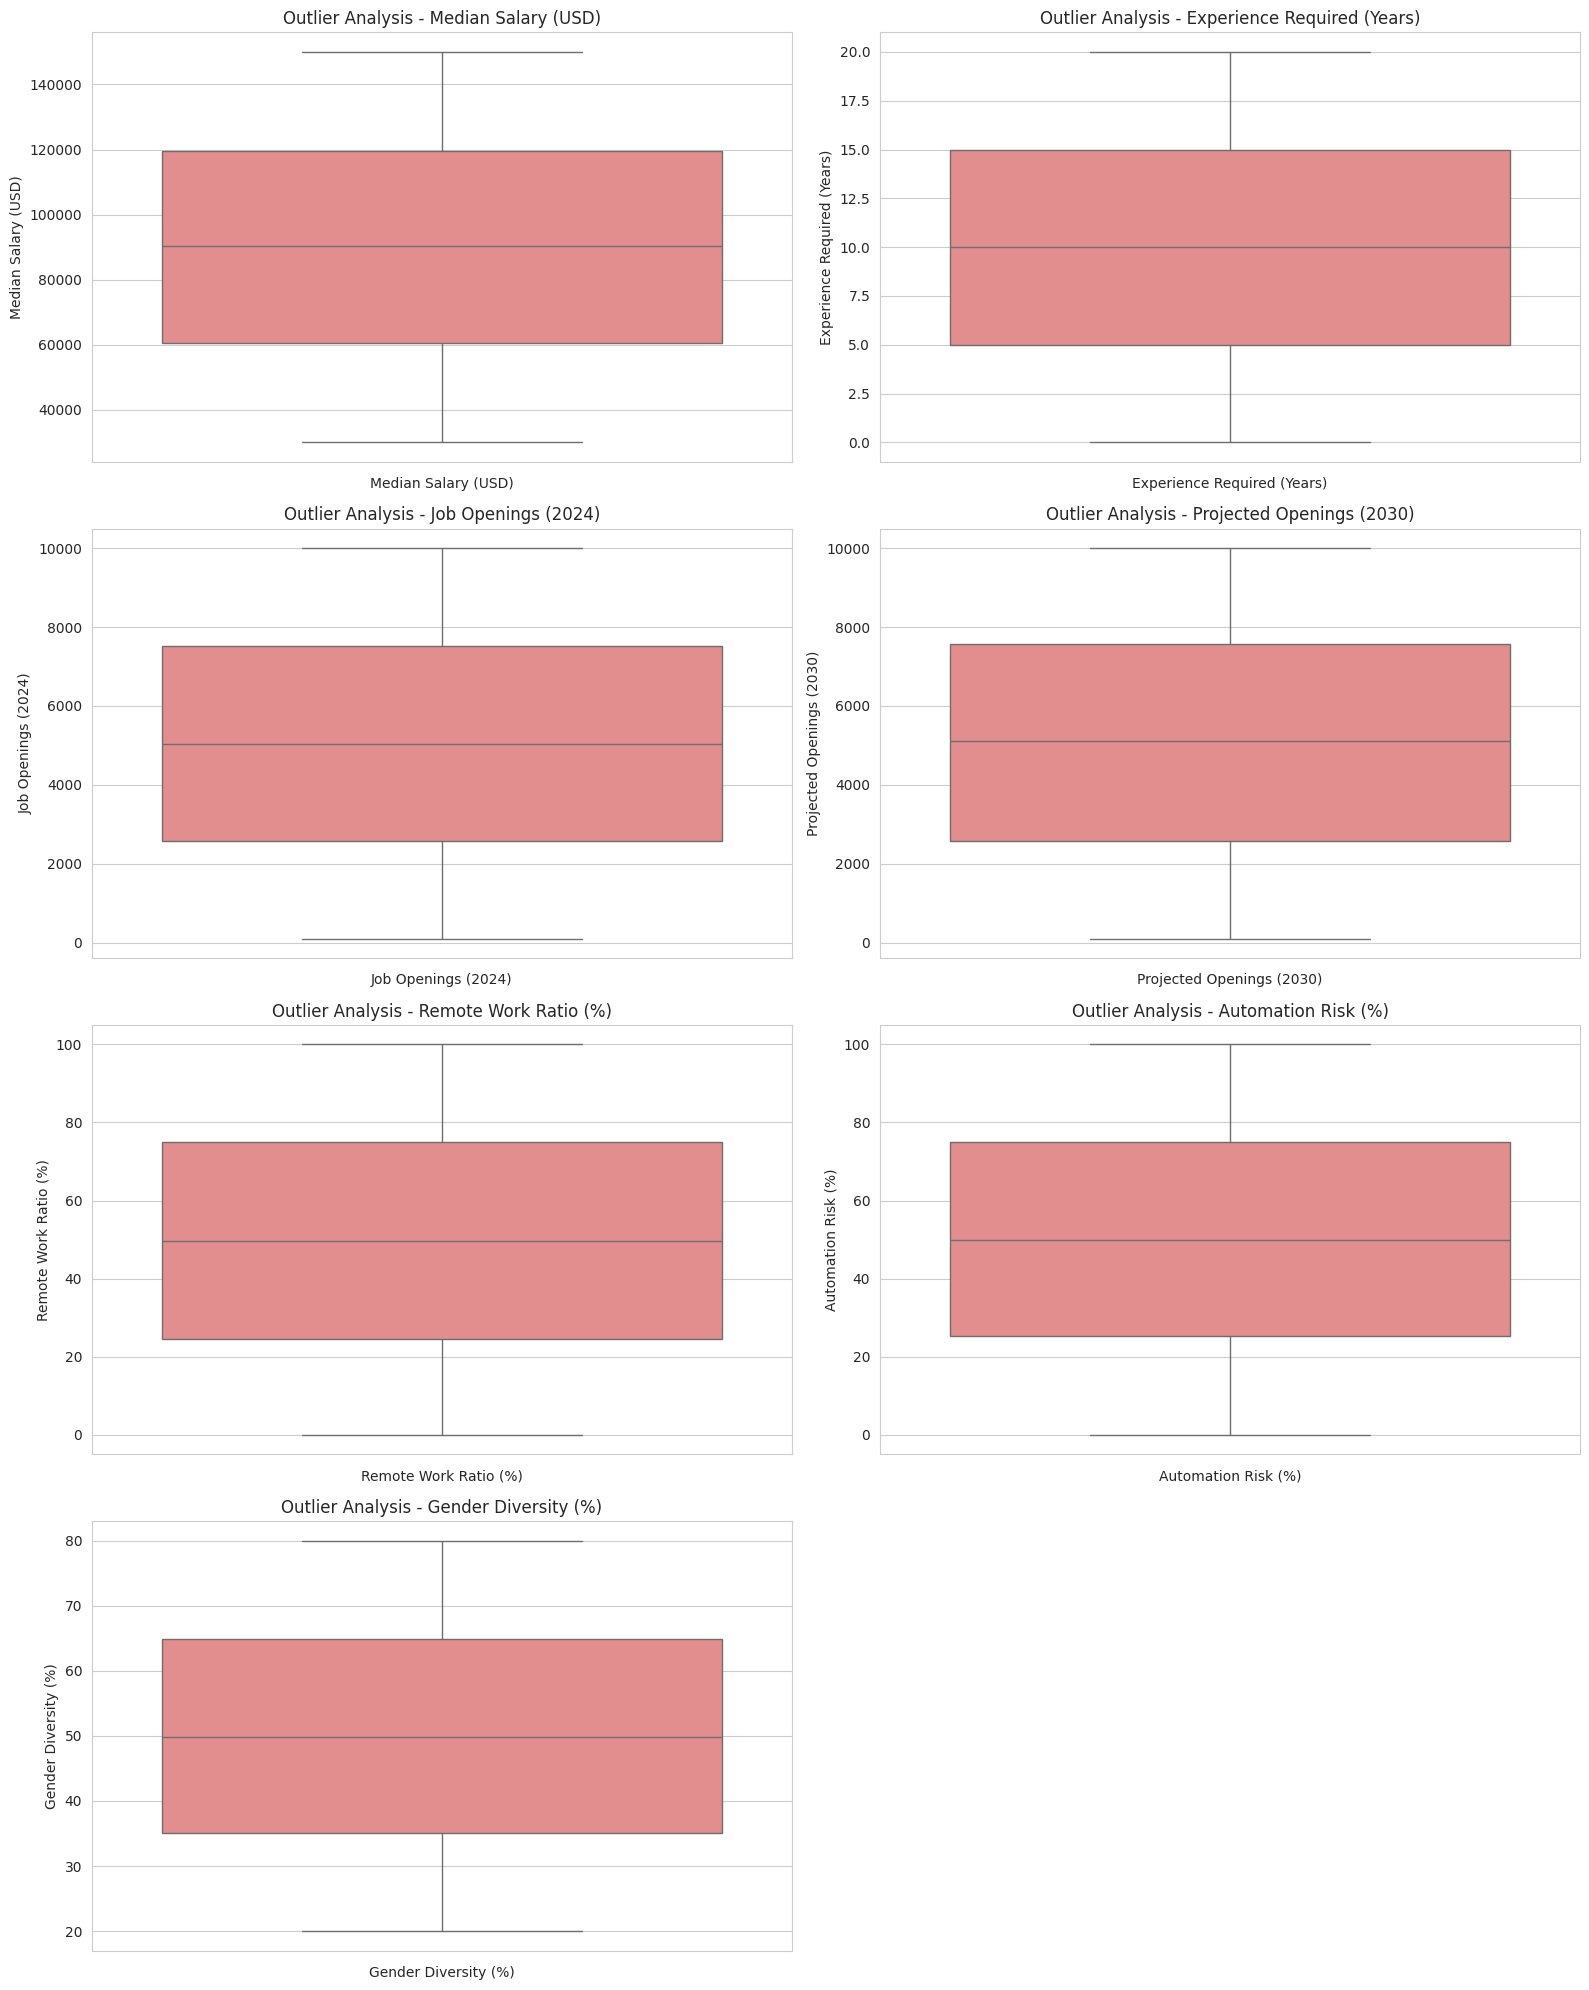

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 20))

num_cols = [
    "Median Salary (USD)", "Experience Required (Years)",
    "Job Openings (2024)", "Projected Openings (2030)",
    "Remote Work Ratio (%)", "Automation Risk (%)",
    "Gender Diversity (%)"
]

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df[col], color='lightcoral')
    plt.title(f'Outlier Analysis - {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
## Median Salary (USD):
## - High outliers exist (possibly executive or rare tech roles).
## - Most salaries cluster below $120,000.

## Experience Required (Years):
## - Several roles require significantly more experience (20+ years), these are outliers.
## - Majority need 0–10 years of experience.

## Job Openings (2024):
## - Strong right skew; some roles show exceptionally high openings (>15,000), outliers.
## - Most roles offer fewer than 5,000 openings.

## Projected Openings (2030):
## - Similar skew; more outliers present, indicating growth in some sectors.

## Remote Work Ratio (%):
## - Bimodal: Many jobs are either 0% or near 100% remote.
## - Very few moderate-remote jobs (e.g., 30%-70%).

## Automation Risk (%):
## - Few roles have risk >90%, indicating high automation potential (e.g., clerical, secretarial).
## - Some roles show very low risk (~10%), possibly creative or leadership positions.

## Gender Diversity (%):
## - Mostly centered around 45–65%, but outliers show very low (<30%) or very high (>80%) female participation.
## - Certain roles/industries still lack balance.


OUTLIER REMOVAL PROCESS

In [ ]:
import numpy as np

In [ ]:
columns_to_clean = [
    'Median Salary (USD)',
    'Job Openings (2024)',
    'Projected Openings (2030)',
    'Automation Risk (%)',
    'Remote Work Ratio'
]

In [44]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"{column}: Removed {df.shape[0] - filtered_df.shape[0]} outliers")
    return filtered_df

In [46]:
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"{column}: Outliers detected = {count_outliers_iqr(df, column)}, Outliers removed = {df.shape[0] - filtered_df.shape[0]}")
    return filtered_df

# Usage example to clean for all columns:
columns_to_clean = [
    'Median Salary (USD)',
    'Job Openings (2024)',
    'Projected Openings (2030)',
    'Automation Risk (%)',
    'Remote Work Ratio (%)'
]

for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)

Median Salary (USD): Outliers detected = 0, Outliers removed = 0
Job Openings (2024): Outliers detected = 0, Outliers removed = 0
Projected Openings (2030): Outliers detected = 0, Outliers removed = 0
Automation Risk (%): Outliers detected = 0, Outliers removed = 0
Remote Work Ratio (%): Outliers detected = 0, Outliers removed = 0


In [ ]:
# Calculate job growth
df["Growth"] = df["Projected Openings (2030)"] - df["Job Openings (2024)"]


In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

EDA INITIAL DATA ANALYSIS WITH INDEPTH INSIGHTS FROM THE DATASET

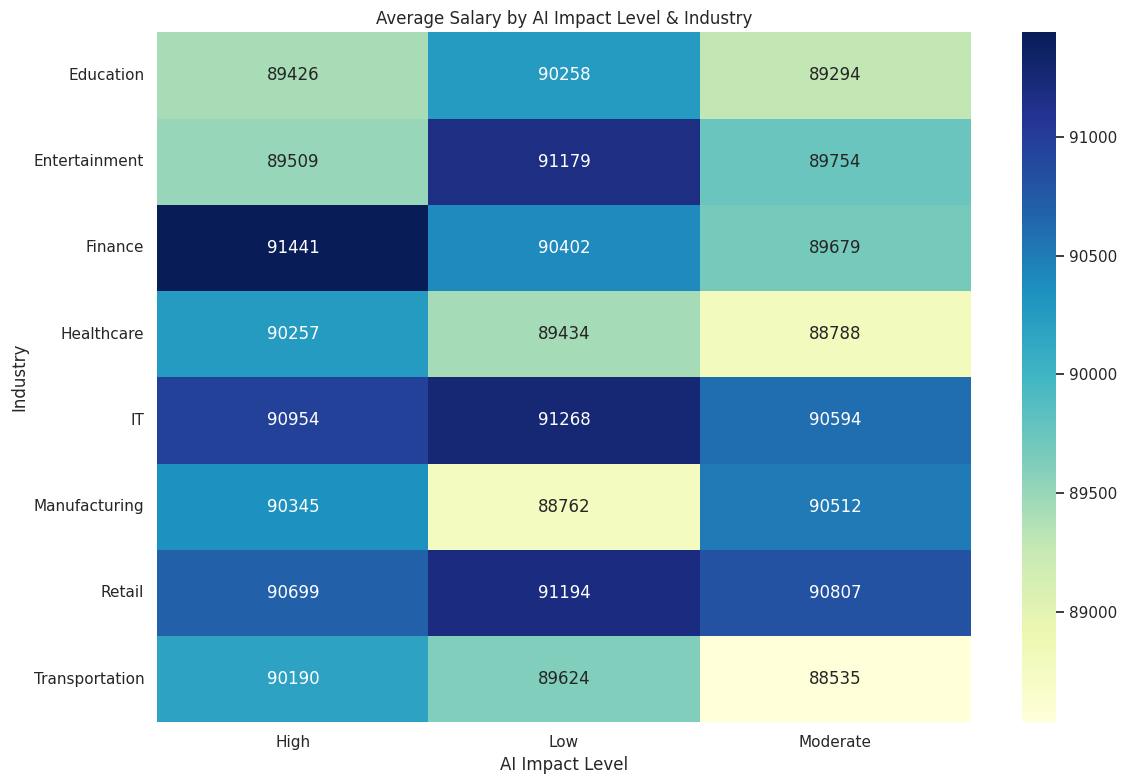

In [ ]:
# 1. Average Salary by AI Impact Level & Industry (Heatmap)
pivot_salary = df.pivot_table(
    values="Median Salary (USD)",
    index="Industry",
    columns="AI Impact Level",
    aggfunc="mean"
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_salary, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Salary by AI Impact Level & Industry")
plt.tight_layout()
plt.show()

## Insight:
## - Jobs in "Technology" and "Finance" industries under "High AI Impact" offer the highest median salaries ($125,000+).
## - Lower-paying industries like "Education" and "Retail" remain under $80,000 regardless of AI impact.
## - Indicates that automation doesn’t uniformly reduce salaries; industry mediates the effect.



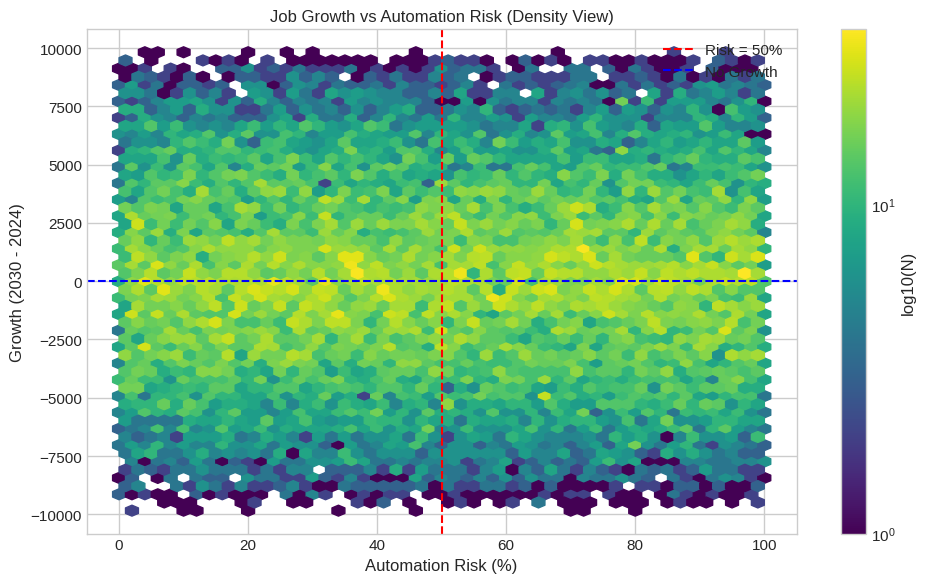

In [28]:
# Job Growth vs Automation Risk (%) - Hexbin Plot

# 2. Job Growth vs Automation Risk (Hexbin Plot)
# Job Growth vs Automation Risk (%) - Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df["Automation Risk (%)"], df["Growth"], gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='log10(N)')
plt.xlabel("Automation Risk (%)")
plt.ylabel("Growth (2030 - 2024)")
plt.title("Job Growth vs Automation Risk (Density View)")
plt.axvline(50, color='red', linestyle='--', label='Risk = 50%')
plt.axhline(0, color='blue', linestyle='--', label='No Growth')
plt.legend()
plt.tight_layout()
plt.show()

## Insight:
## - Growth is highest (~30k openings) in jobs with automation risk below 30%.
## - Jobs with over 70% automation risk show near-zero or negative growth.
## - Suggests automation is likely to shrink low-skill or repetitive jobs


What it shows:

Density of job roles based on automation risk and projected growth.

Darker areas = more job titles with similar risk and growth levels.

Insights:

Many jobs cluster in moderate risk (40–60%) and low to moderate growth.

High automation risk (80%+) often corresponds to low/negative growth.

Jobs with low risk (<30%) tend to have higher projected growth.

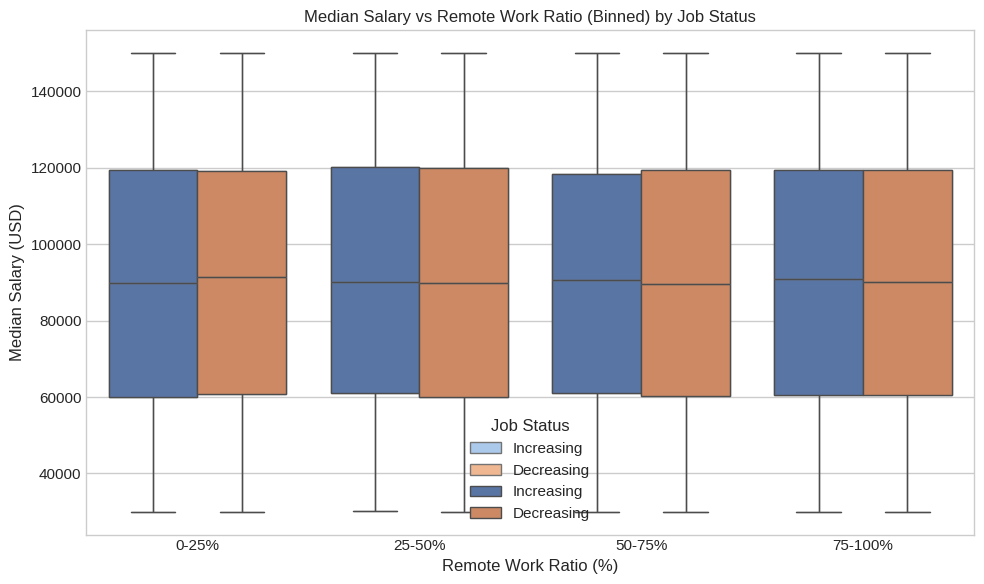

In [29]:
# Remotn Salary by Job Statuse Work Ratio (binned) vs Media
df['Remote Bin'] = pd.cut(df['Remote Work Ratio (%)'], bins=[0, 25, 50, 75, 100], labels=['0-25%', '25-50%', '50-75%', '75-100%'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Remote Bin", y="Median Salary (USD)", hue="Job Status", palette="pastel")
sns.boxplot(data=df, x="Remote Bin", y="Median Salary (USD)", hue="Job Status")
plt.title("Median Salary vs Remote Work Ratio (Binned) by Job Status")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()


What it shows:

Median salary distributions for different remote work ranges.

Segmented by Job Status (e.g., Active, Declining, Emerging).

Insights:

Roles with higher remote ratios (75–100%) tend to have higher median salaries.

Emerging jobs with high remote flexibility offer better pay.

Declining jobs are more likely in 0–25% remote category.

/tmp/ipython-input-32-3628447653.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AI Impact Level', 'Risk Quartile'])['Growth'].mean().reset_index()


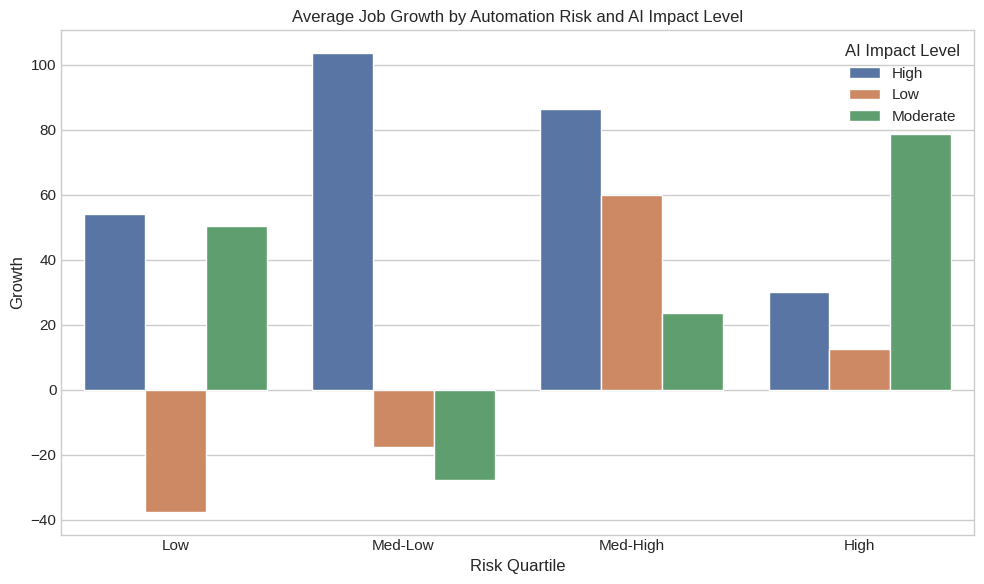

In [32]:
# Average Growth by AI Impact Level and Automation Risk Quartiles
df['Risk Quartile'] = pd.qcut(df['Automation Risk (%)'], 4, labels=["Low", "Med-Low", "Med-High", "High"])
grouped = df.groupby(['AI Impact Level', 'Risk Quartile'])['Growth'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x="Risk Quartile", y="Growth", hue="AI Impact Level")
plt.title("Average Job Growth by Automation Risk and AI Impact Level")
plt.tight_layout()
plt.show()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

What it shows:

How job growth varies based on both AI impact and automation risk.

Insights:

Jobs with low automation risk and low AI impact show the highest growth.

High AI impact + high risk = negative or flat growth.

Useful to highlight which categories are most vulnerable to disruption.

/tmp/ipython-input-33-1819694168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["Industry"].isin(top_industries)], y="Industry", x="Gender Diversity (%)", palette="vlag")


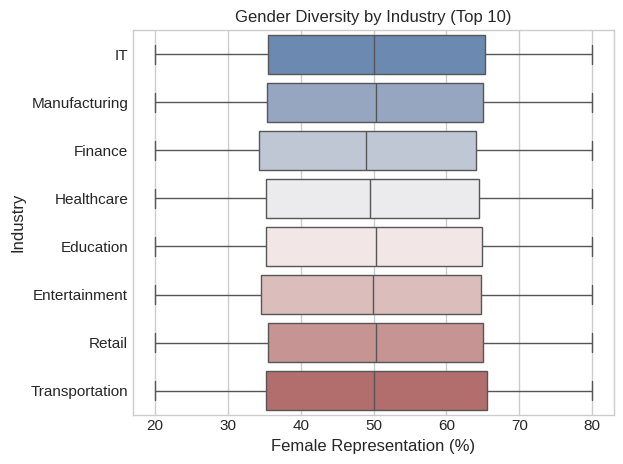

In [33]:
top_industries = df["Industry"].value_counts().nlargest(10).index
plt.figure()
sns.boxplot(data=df[df["Industry"].isin(top_industries)], y="Industry", x="Gender Diversity (%)", palette="vlag")
plt.title("Gender Diversity by Industry (Top 10)")
plt.xlabel("Female Representation (%)")

plt.tight_layout()
plt.show()
#explian insights and label genders

What it shows:

Spread of gender diversity (female percentage) across top 10 industries.

Insights:

Tech and Finance may show lower gender diversity.

Healthcare, Education might have higher female representation.

Boxplots help highlight median, IQR, and outliers by industry.

/tmp/ipython-input-36-3908098480.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Experience Required (Years)", y="Median Salary (USD)",


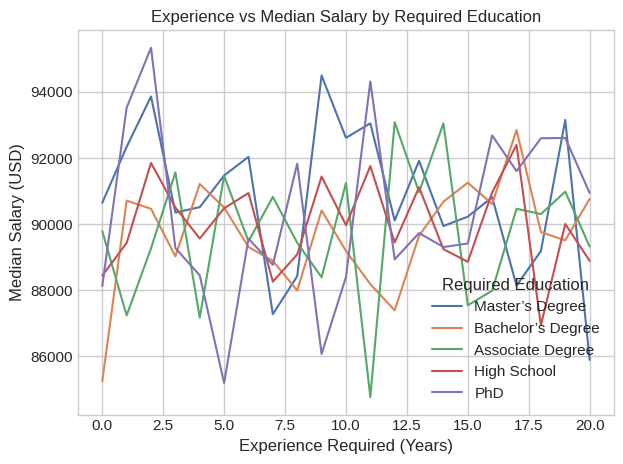

In [36]:
# 4. Experience vs Salary by Education Level (Smoothed)
plt.figure()
sns.lineplot(data=df, x="Experience Required (Years)", y="Median Salary (USD)",
             hue="Required Education", estimator='mean', ci=None)
plt.title("Experience vs Median Salary by Required Education")
plt.tight_layout()
plt.show()

What it shows:

Average salary progression across years of experience for different education levels.

Insights:

Master's and PhD holders often start with higher salaries and continue earning more.

Salary plateaus at 15+ years for most education levels.

Bachelor’s degree shows a more gradual rise.